In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv('Datasets/performances.csv')

In [41]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [42]:
Only_max=df[df['option']=='m-only-max']
Suppress_all=df[df['option']=='m-suppress-all']
Half=df[df['option']=='m-half']
Top_x=df[df['option'].str.startswith('Top_x')]

## Runtime vs P

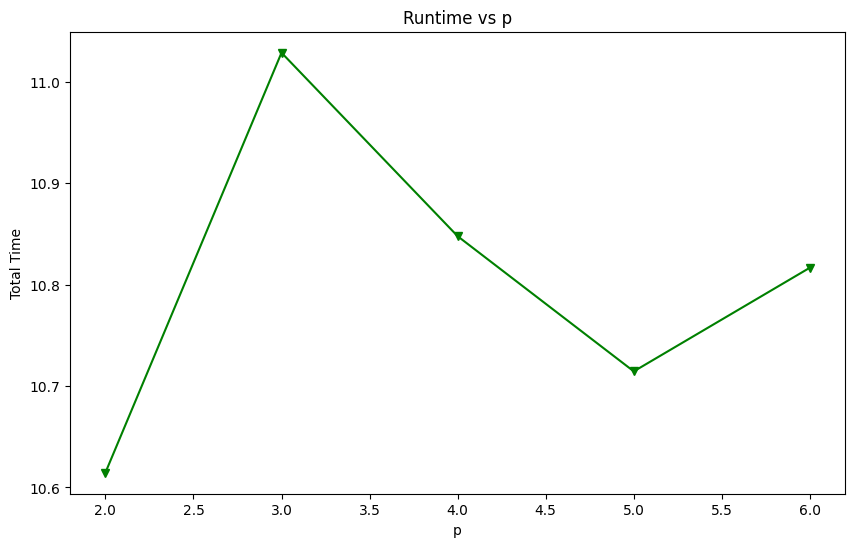

In [43]:
p_vs_runtime=df.query('h==0.8 and k==20')
p_vs_runtime=p_vs_runtime.groupby('p')['total_time'].mean().reset_index()

plt.figure(figsize=(10, 6)) 

plt.plot(p_vs_runtime['p'], p_vs_runtime['total_time'], marker='v',color='green')

plt.xlabel('p')
plt.ylabel('Total Time')
plt.title('Runtime vs p')

plt.show()


## Runtime vs K

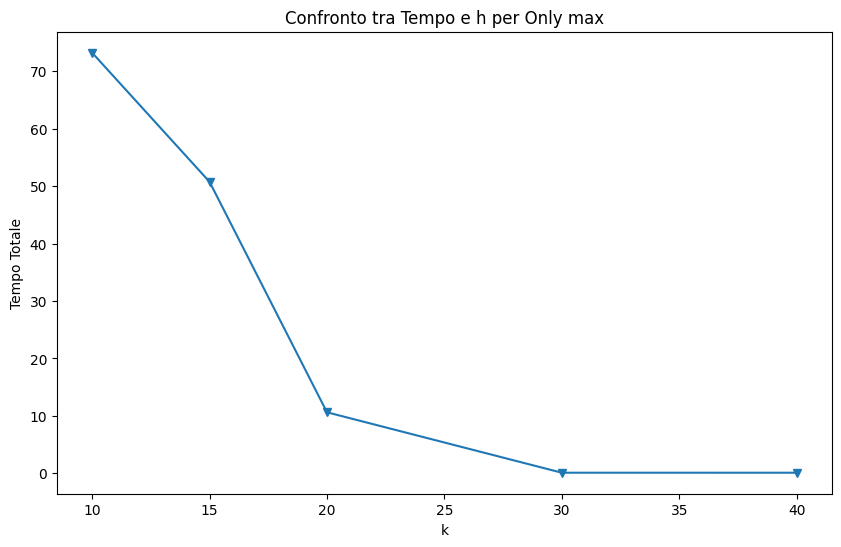

In [44]:
k_vs_runtime=df.query('h==0.8 and p==2')
k_vs_runtime=k_vs_runtime.groupby('k')['total_time'].mean().reset_index()

plt.figure(figsize=(10, 6)) 

plt.plot(k_vs_runtime['k'], k_vs_runtime['total_time'], label='Only_max', marker='v')

plt.xlabel('k')
plt.ylabel('Tempo Totale')
plt.title('Confronto tra Tempo e h per Only max')
#plt.legend()

plt.show()

## Runtime vs Top_x

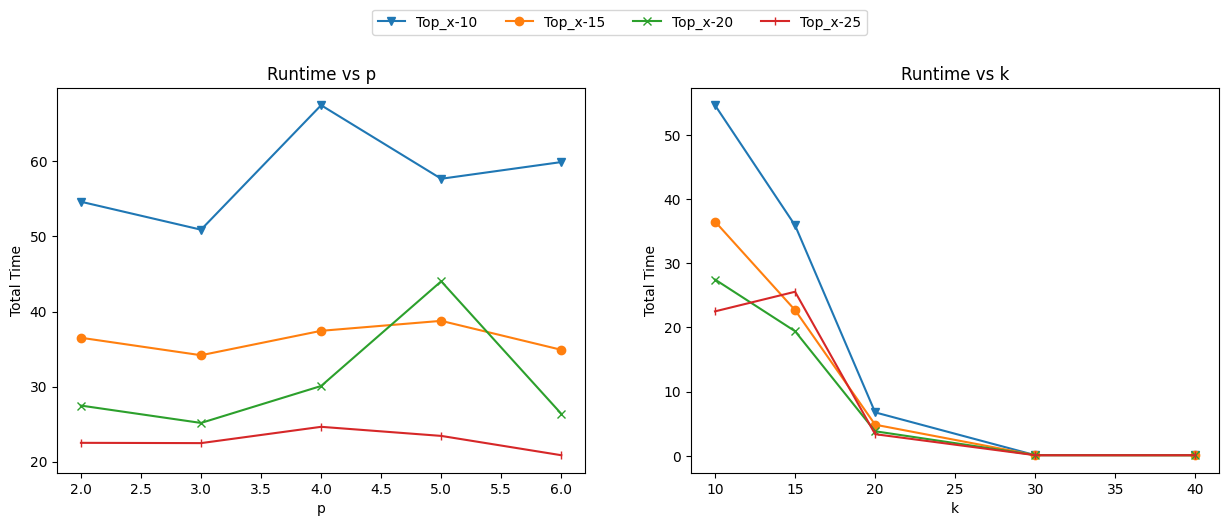

In [45]:
fig,axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

top_10 = Top_x.query('h==0.8 and k==10 and option=="Top_x-10"')
top_15 = Top_x.query('h==0.8 and k==10 and option=="Top_x-15"')
top_20 = Top_x.query('h==0.8 and k==10 and option=="Top_x-20"')
top_25 = Top_x.query('h==0.8 and k==10 and option=="Top_x-25"')

axs[0].plot(top_10['p'], top_10['total_time'], label='Top_x-10', marker='v')
axs[0].plot(top_15['p'], top_15['total_time'], label='Top_x-15', marker='o')
axs[0].plot(top_20['p'], top_20['total_time'], label='Top_x-20', marker='x')
axs[0].plot(top_25['p'], top_25['total_time'], label='Top_x-25', marker='|')

axs[0].title.set_text('Runtime vs p')
axs[0].set_xlabel('p')
axs[0].set_ylabel('Total Time')

top_10 = Top_x.query('h==0.8 and p==2 and option=="Top_x-10"')
top_15 = Top_x.query('h==0.8 and p==2 and option=="Top_x-15"')
top_20 = Top_x.query('h==0.8 and p==2 and option=="Top_x-20"')
top_25 = Top_x.query('h==0.8 and p==2 and option=="Top_x-25"')

axs[1].plot(top_10['k'], top_10['total_time'], label='Top_x-10', marker='v')
axs[1].plot(top_15['k'], top_15['total_time'], label='Top_x-15', marker='o')
axs[1].plot(top_20['k'], top_20['total_time'], label='Top_x-20', marker='x')
axs[1].plot(top_25['k'], top_25['total_time'], label='Top_x-25', marker='|')

axs[1].title.set_text('Runtime vs k')
axs[1].set_xlabel('k')
axs[1].set_ylabel('Total Time')

labels = ['Top_x-10', 'Top_x-15', 'Top_x-20', 'Top_x-25']
fig.legend(labels,loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4)
plt.show()

## Utility Loss vs Top_x

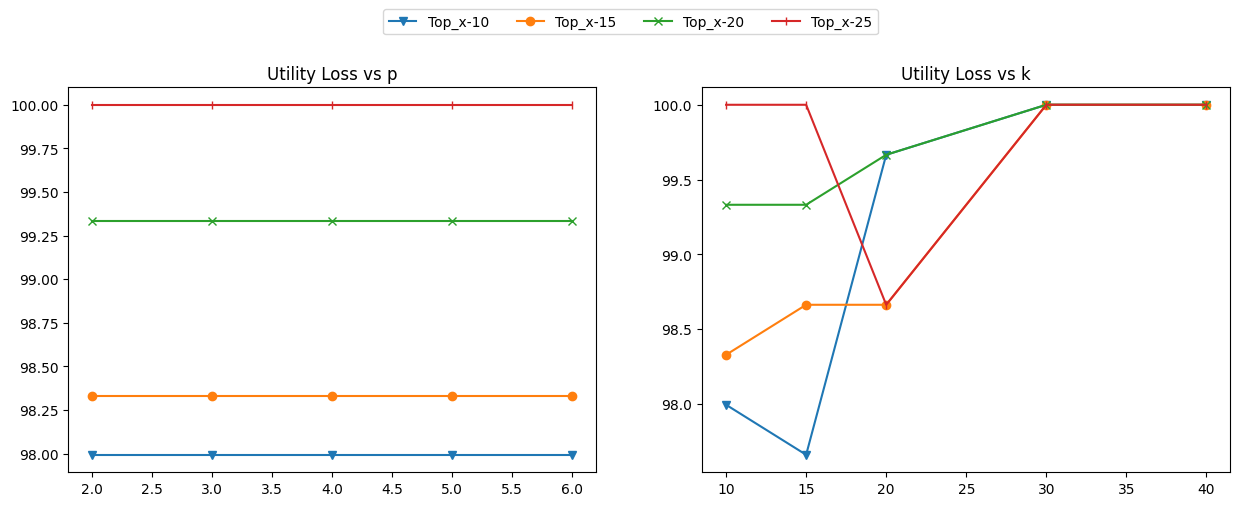

In [123]:
fig,axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

top_10 = Top_x.query('h==0.8 and k==10 and option=="Top_x-10"')
top_15 = Top_x.query('h==0.8 and k==10 and option=="Top_x-15"')
top_20 = Top_x.query('h==0.8 and k==10 and option=="Top_x-20"')
top_25 = Top_x.query('h==0.8 and k==10 and option=="Top_x-25"')

axs[0].plot(top_10['p'], top_10['Utility Loss'], label='Top_x-10', marker='v')
axs[0].plot(top_15['p'], top_15['Utility Loss'], label='Top_x-15', marker='o')
axs[0].plot(top_20['p'], top_20['Utility Loss'], label='Top_x-20', marker='x')
axs[0].plot(top_25['p'], top_25['Utility Loss'], label='Top_x-25', marker='|')

axs[0].title.set_text('Utility Loss vs p')

top_10 = Top_x.query('h==0.8 and p==2 and option=="Top_x-10"')
top_15 = Top_x.query('h==0.8 and p==2 and option=="Top_x-15"')
top_20 = Top_x.query('h==0.8 and p==2 and option=="Top_x-20"')
top_25 = Top_x.query('h==0.8 and p==2 and option=="Top_x-25"')

axs[1].plot(top_10['k'], top_10['Utility Loss'], label='Top_x-10', marker='v')
axs[1].plot(top_15['k'], top_15['Utility Loss'], label='Top_x-15', marker='o')
axs[1].plot(top_20['k'], top_20['Utility Loss'], label='Top_x-20', marker='x')
axs[1].plot(top_25['k'], top_25['Utility Loss'], label='Top_x-25', marker='|')

axs[1].title.set_text('Utility Loss vs k')

labels = ['Top_x-10', 'Top_x-15', 'Top_x-20', 'Top_x-25']
fig.legend(labels,loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4)
plt.show()


## Utility Loss vs k

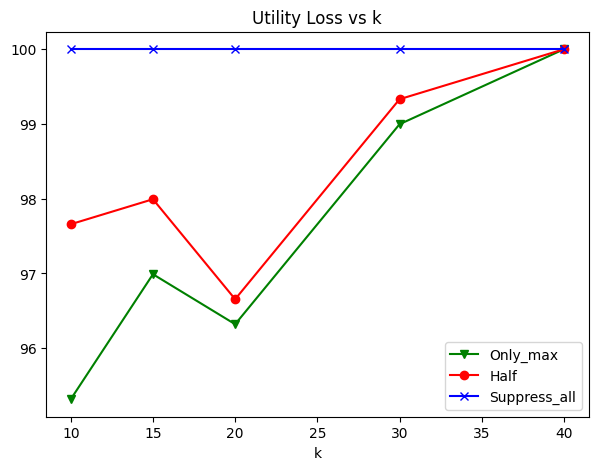

In [120]:
fig,ax = plt.subplots(nrows=1, figsize=(7, 5))

Only_max.query('h == 0.8 and p == 2').plot(x='k', y='Utility Loss', kind='line', marker='v', color='green', label='Only_max',ax=ax)
Half.query('h == 0.8 and p == 2').plot(x='k', y='Utility Loss', kind='line', marker='o', color='red', label='Half',ax=ax)
Suppress_all.query('h == 0.8 and p == 2').plot(x='k', y='Utility Loss', kind='line', marker='x', color='blue', label='Suppress_all',ax=ax)

plt.title('Utility Loss vs k')
plt.show()


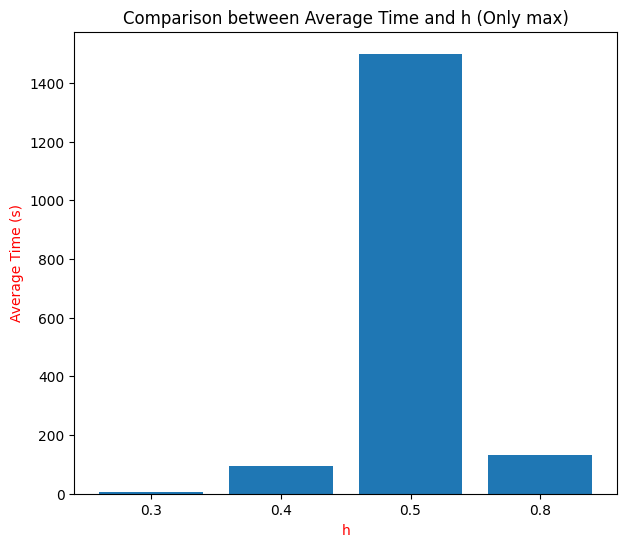

In [21]:
plt.figure(figsize=(7, 6)) 

mean_times = Only_max.groupby('h')['total_time'].mean().reset_index()
unique_h_values = mean_times['h'].unique()

plt.bar(mean_times.index, mean_times['total_time'])

plt.xlabel('h', color='red')
plt.ylabel('Average Time (s)', color='red')
plt.title('Comparison between Average Time and h (Only max)')

plt.xticks(mean_times.index, [str(x) for x in unique_h_values], rotation='horizontal', ha='center')

plt.show()

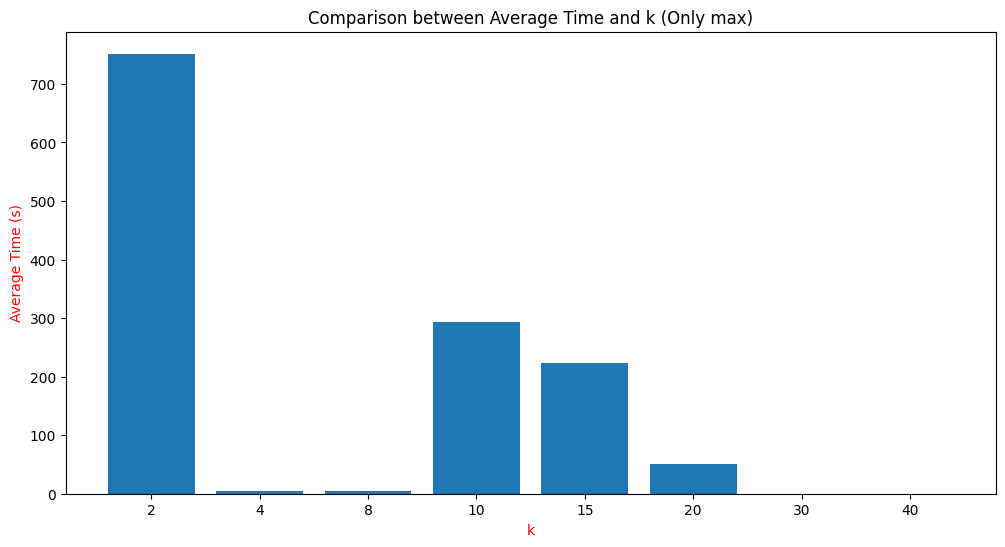

In [22]:
plt.figure(figsize=(12, 6)) 

mean_times = Only_max.groupby('k')['total_time'].mean().reset_index()
unique_h_values = mean_times['k'].unique()

plt.bar(mean_times.index, mean_times['total_time'])

plt.xlabel('k', color='red')
plt.ylabel('Average Time (s)', color='red')
plt.title('Comparison between Average Time and k (Only max)')

plt.xticks(mean_times.index, [str(x) for x in unique_h_values], rotation='horizontal', ha='center')

plt.show()

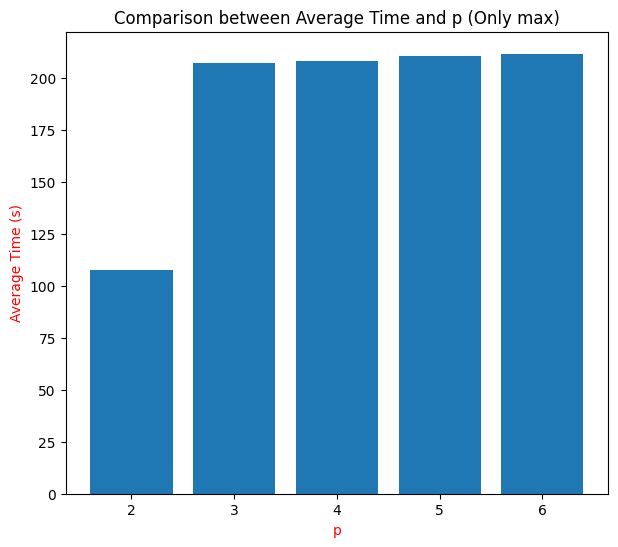

In [23]:
plt.figure(figsize=(7, 6)) 

mean_times = Only_max.groupby('p')['total_time'].mean().reset_index()
unique_h_values = mean_times['p'].unique()

plt.bar(mean_times.index, mean_times['total_time'])

plt.xlabel('p', color='red')
plt.ylabel('Average Time (s)', color='red')
plt.title('Comparison between Average Time and p (Only max)')

plt.xticks(mean_times.index, [str(x) for x in unique_h_values], rotation='horizontal', ha='center')

plt.show()

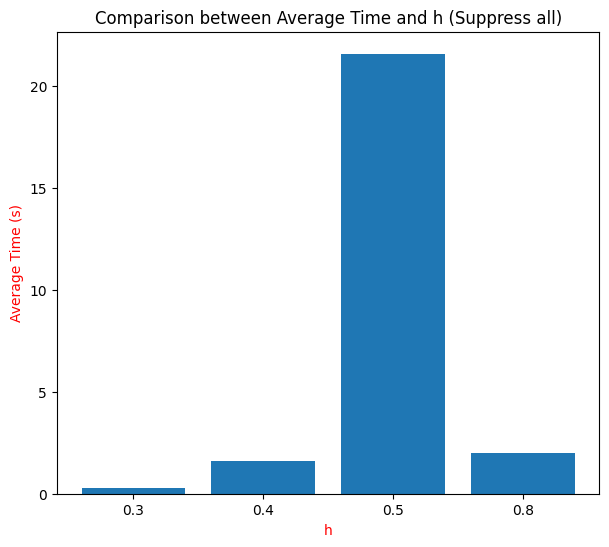

In [24]:
plt.figure(figsize=(7,6)) 

mean_times = Suppress_all.groupby('h')['total_time'].mean().reset_index()
unique_h_values = mean_times['h'].unique()

plt.bar(mean_times.index, mean_times['total_time'])

plt.xlabel('h', color='red')
plt.ylabel('Average Time (s)', color='red')
plt.title('Comparison between Average Time and h (Suppress all)')

plt.xticks(mean_times.index, [str(x) for x in unique_h_values], rotation='horizontal', ha='center')

plt.show()

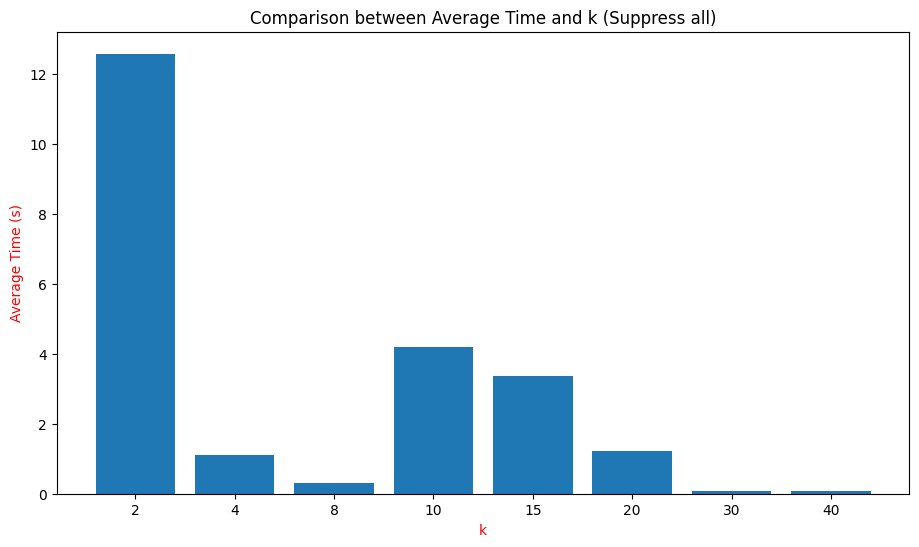

In [25]:
plt.figure(figsize=(11, 6)) 

mean_times = Suppress_all.groupby('k')['total_time'].mean().reset_index()
unique_h_values = mean_times['k'].unique()

plt.bar(mean_times.index, mean_times['total_time'])

plt.xlabel('k', color='red')
plt.ylabel('Average Time (s)', color='red')
plt.title('Comparison between Average Time and k (Suppress all)')

plt.xticks(mean_times.index, [str(x) for x in unique_h_values], rotation='horizontal', ha='center')

plt.show()

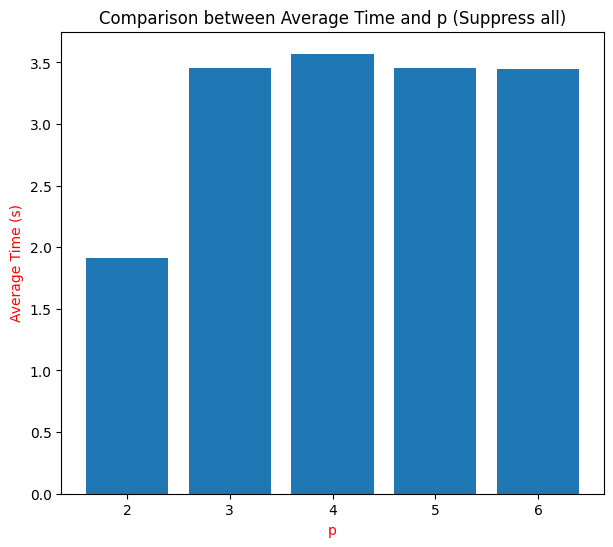

In [26]:
plt.figure(figsize=(7, 6)) 

mean_times = Suppress_all.groupby('p')['total_time'].mean().reset_index()
unique_h_values = mean_times['p'].unique()

plt.bar(mean_times.index, mean_times['total_time'])

plt.xlabel('p', color='red')
plt.ylabel('Average Time (s)', color='red')
plt.title('Comparison between Average Time and p (Suppress all)')

plt.xticks(mean_times.index, [str(x) for x in unique_h_values], rotation='horizontal', ha='center')

plt.show()

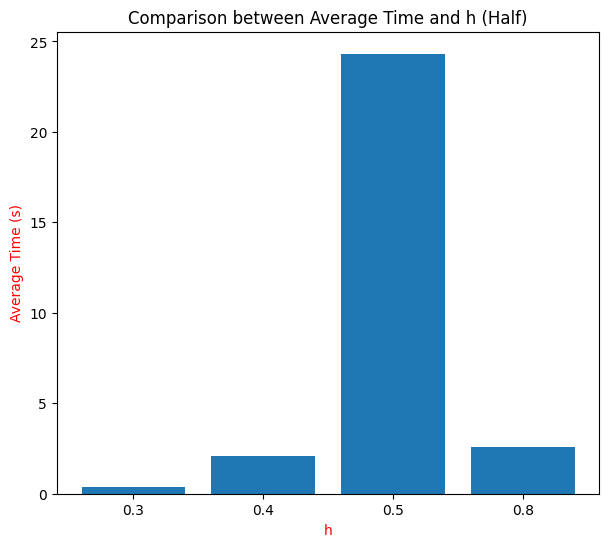

In [27]:
plt.figure(figsize=(7, 6)) 

mean_times = Half.groupby('h')['total_time'].mean().reset_index()
unique_h_values = mean_times['h'].unique()

plt.bar(mean_times.index, mean_times['total_time'])

plt.xlabel('h', color='red')
plt.ylabel('Average Time (s)', color='red')
plt.title('Comparison between Average Time and h (Half)')

plt.xticks(mean_times.index, [str(x) for x in unique_h_values], rotation='horizontal', ha='center')

plt.show()

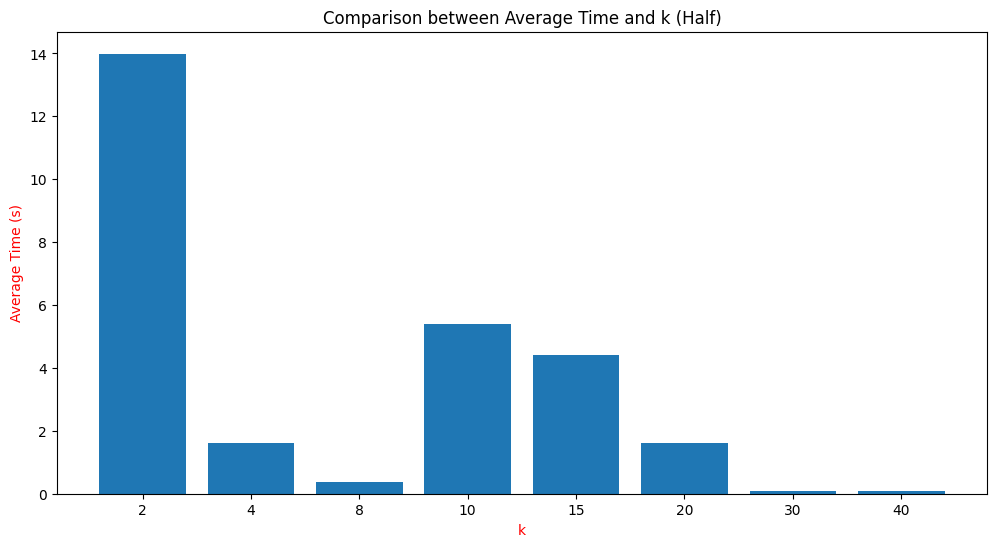

In [28]:
plt.figure(figsize=(12, 6)) 

mean_times = Half.groupby('k')['total_time'].mean().reset_index()
unique_h_values = mean_times['k'].unique()

plt.bar(mean_times.index, mean_times['total_time'])

plt.xlabel('k', color='red')
plt.ylabel('Average Time (s)', color='red')
plt.title('Comparison between Average Time and k (Half)')

plt.xticks(mean_times.index, [str(x) for x in unique_h_values], rotation='horizontal', ha='center')

plt.show()

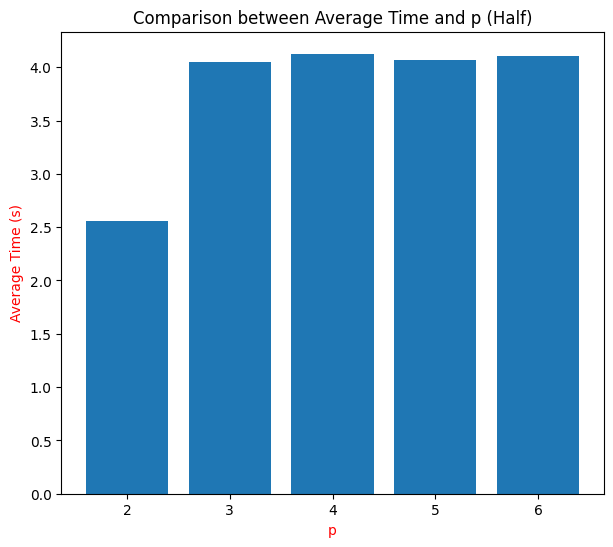

In [29]:
plt.figure(figsize=(7, 6)) 

mean_times = Half.groupby('p')['total_time'].mean().reset_index()
unique_h_values = mean_times['p'].unique()

plt.bar(mean_times.index, mean_times['total_time'])

plt.xlabel('p', color='red')
plt.ylabel('Average Time (s)', color='red')
plt.title('Comparison between Average Time and p (Half)')
plt.xticks(mean_times.index, [str(x) for x in unique_h_values], rotation='horizontal', ha='center')

plt.show()

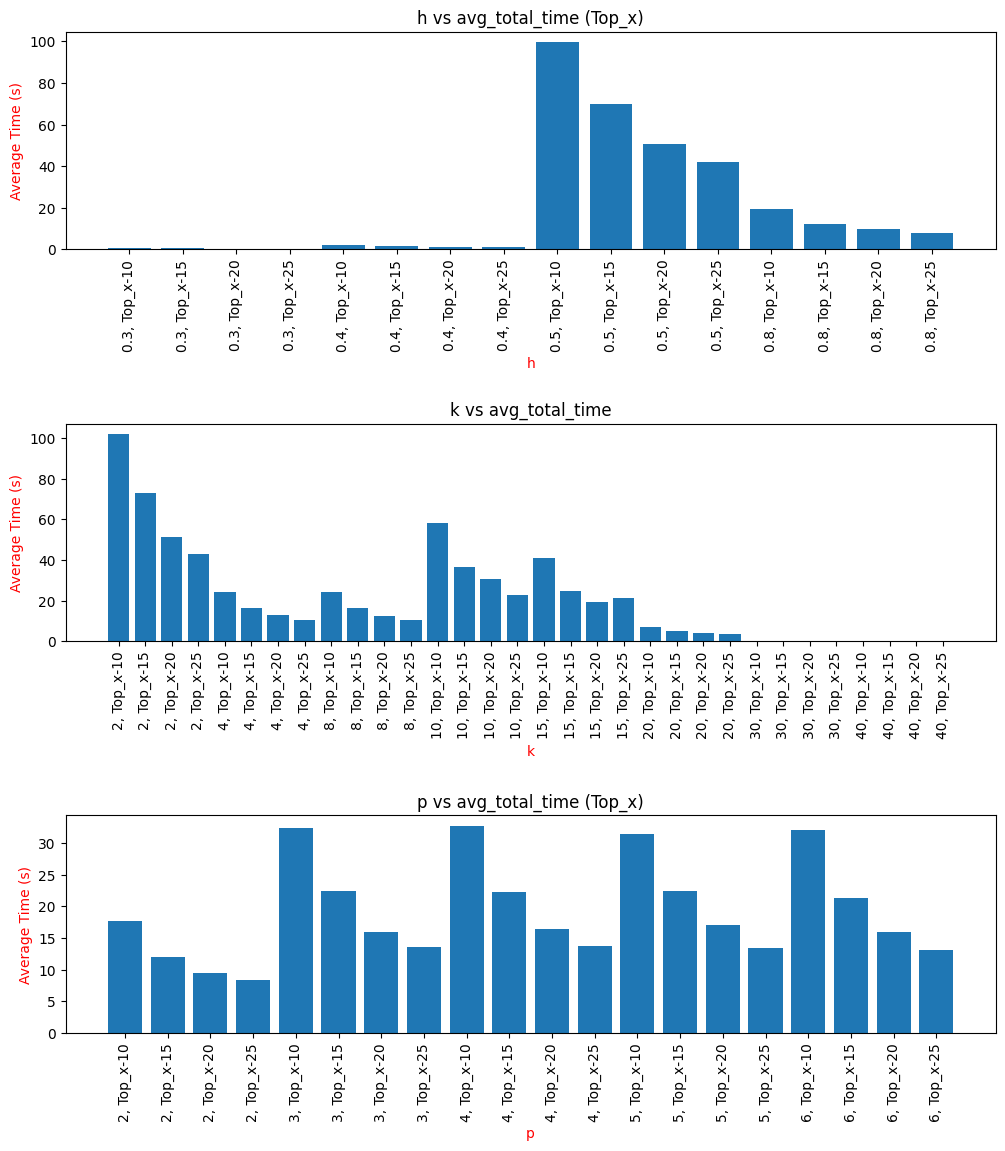

In [173]:
fig,axs = plt.subplots(nrows=3, ncols=1, figsize=(12, 13))

mean_times = Top_x.groupby(['h', 'option'])['total_time'].mean().reset_index()
 
axs[0].bar(range(len(mean_times)), mean_times['total_time'])

axs[0].set_xlabel('h', color='red')
axs[0].set_ylabel('Average Time (s)', color='red')
axs[0].title.set_text('h vs avg_total_time (Top_x)')

x_labels = [f'{h}, {top_x}' for h, top_x in zip(mean_times['h'], mean_times['option'])]
axs[0].set_xticks(range(len(mean_times)), x_labels, rotation='vertical', ha='center')

mean_times = Top_x.groupby(['k', 'option'])['total_time'].mean().reset_index()
 
axs[1].bar(range(len(mean_times)), mean_times['total_time'])

axs[1].set_xlabel('k', color='red')
axs[1].set_ylabel('Average Time (s)', color='red')
axs[1].title.set_text('k vs avg_total_time')

x_labels = [f'{h}, {top_x}' for h, top_x in zip(mean_times['k'], mean_times['option'])]
axs[1].set_xticks(range(len(mean_times)), x_labels, rotation='vertical', ha='center')


mean_times = Top_x.groupby(['p', 'option'])['total_time'].mean().reset_index()

axs[2].bar(range(len(mean_times)), mean_times['total_time'])

axs[2].set_xlabel('p', color='red')
axs[2].set_ylabel('Average Time (s)', color='red')
axs[2].title.set_text('p vs avg_total_time (Top_x)')

x_labels = [f'{h}, {top_x}' for h, top_x in zip(mean_times['p'], mean_times['option'])]
axs[2].set_xticks(range(len(mean_times)), x_labels, rotation='vertical', ha='center')

plt.subplots_adjust(hspace=0.8)

plt.show()